In [1]:
from test1 import Test
from calculator import Calculator
from const import Const
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cal=Calculator()
cal.me.change_const(Const(0.3))
cal.read_excel('Data2.xlsx')
order=3
m=cal.M_p[order]
cal.me.con.set_M_p(m)
L_s=cal.L_init[order]
ST=cal.ST[order]

In [3]:
cal.me.cal_ML_simple_B(ST,L_s,True,0.0,1e-5)
G=cal.me.g
r=cal.me.r
P,T,M,L=cal.me.P,cal.me.T,cal.me.M,cal.me.L
c_P,c_T=cal.me.con.c_P,cal.me.con.c_T
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],cal.me.con.g_ad)*(T[i]*dP[i]/P[i])
control=(cal.me.con.sigma_2/T**2)*dT
dG=cal.me.dg
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2*(abs(control)<10))*dT)*dG-(r>cal.me.con.depth)*2*cal.me.con.M_v*(1/r-cal.me.con.depth**2/r**3)/cal.me.con.c**2/cal.me.con.R_B
sigma=(-0.5*dP/P)+(0.75/T+cal.me.con.sigma_2/T**2*(abs(control)<10))*dT

-0.19035775779605896


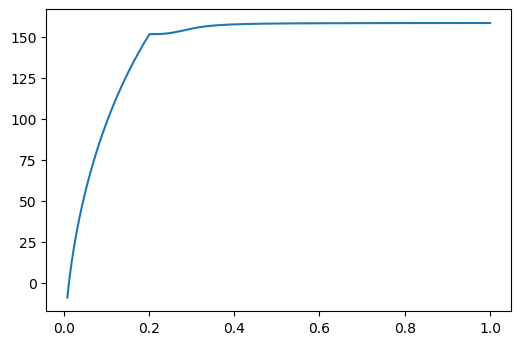

In [4]:
fig=plt.figure(dpi=100)
plt.plot(r,L)
plt.show()

In [5]:
te=Test()
te.con.set_M_p(m)
te.cal_ML_simple_B(ST,L_s,True,0.0,1e+2)
G=te.g
r=te.r
P,T,M,L=te.P,te.T,te.M,te.L
c_P,c_T=te.con.c_P,te.con.c_T
dP=c_P*M*P/(T*r**2)
P_0=te.con.P_0
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],te.con.g_ad)*(T[i]*dP[i]/P[i])
control=(te.con.sigma_2/T**2)*dT
dG=te.dg
ddG=6*G/r**2+(0.5*1e3*(te.f(np.log10(P*P_0)-6+1e-3)-te.f(np.log10(P*P_0)-6-1e-3))*dP/P)*dG+(r>te.con.depth)*2*te.con.M_v*(1/r-te.con.depth**2/r**3)/te.con.c**2/te.con.R_B
sigma=0.5*1e3*(te.f(np.log10(P*P_0)-6+1e-3)-te.f(np.log10(P*P_0)-6-1e-3))*dP/P

-0.19035775779605896


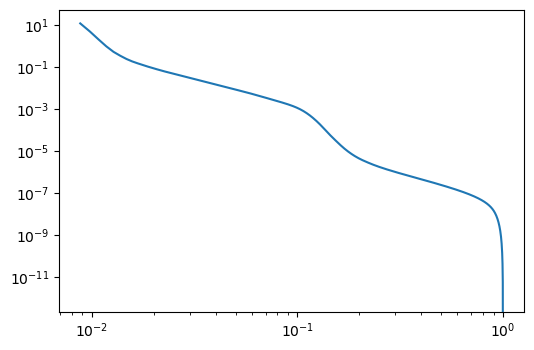

In [7]:
fig=plt.figure(dpi=100)
plt.loglog(r,G/r/te.con.R_B)
plt.show()

In [6]:
(G/r/te.con.R_B)[-1]

12.12778343629796

In [4]:
print(rcb1,rcb2)

NameError: name 'rcb1' is not defined

In [5]:
c_P,c_T,c_M=te.con.c_P,te.con.c_T,te.con.c_M
r,P,T,M,L=te.r,te.P,te.T,te.M,te.L
G=te.g
dG=te.dg
dP=c_P*M*P/(T*r**2)
dT=np.ones(len(dP))
for i in range(len(dT)):
    dT[i]=min(c_T*1e24*abs(L[i])*P[i]**2*T[i]**(-3)/M[i],te.con.g_ad)*(T[i]*dP[i]/P[i])
dsigma=(-0.5*dP/P)+(0.75/T+te.con.sigma_2/T**2)*dT
ddG=6*G/r**2+((-0.5*dP/P)+(0.75/T+te.con.sigma_2/T**2)*dT)*dG-(r>te.con.depth)*2*te.con.M_v*(1/r-te.con.depth**2/r**3)/te.con.c**2/te.con.R_B

AttributeError: 'Const' object has no attribute 'c_P'

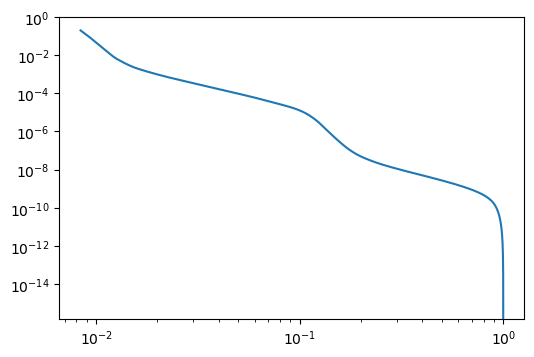

In [5]:
G=te.g
r=te.r
fig=plt.figure(dpi=100)
plt.loglog(r,abs(G)/r/te.con.R_B)
plt.show()

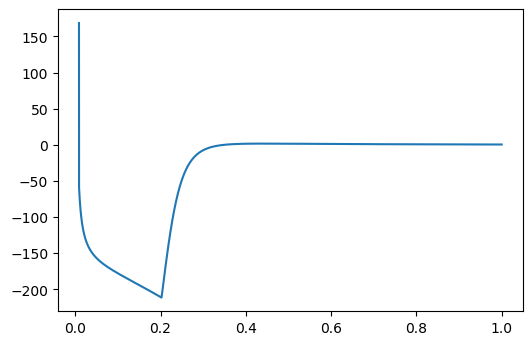

In [11]:
fig=plt.figure(dpi=100)
plt.plot(r,dsigma)
plt.show()

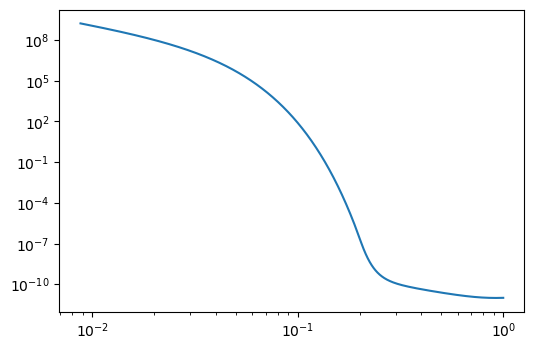

In [12]:
fig=plt.figure(dpi=100)
plt.loglog(r,abs(dG))
plt.show()

In [13]:
gr=np.linspace(-1000,-1,20)
ST=ST*0.01
g=np.array([te.cal_ML_simple_B(ST,L_s,True,0.0,gr[i]) for i in range(len(gr))])

-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896
-0.19035775779605896


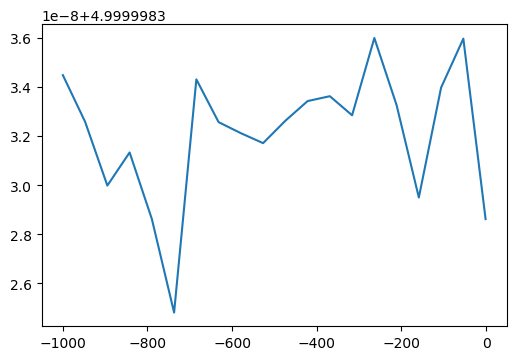

In [14]:
fig=plt.figure(dpi=100)
plt.plot(gr,g[:,0])
plt.show()

In [11]:
ddG[0]*(r[1]-r[0])

-87.88030169418673

In [ ]:
cal.me.cal_ML_simple(ST,L_s)
te.cal_ML_simple_B(ST,L_s,True,0.0,dg/dr)